In [1]:
# boosting is meta learning as we can apply to any machine learning
# product of coeff with an estimator(result of machine learning algo) sum that all into an ensemble
# Adaboost learns from previous weak learner that's why its called adaptive boosting
# make an ensemble of weak learners to create a storn model
# t decide the number of weak learners
# each f of t belongs to one weak learner
# calculate error to adjust alpha which is the coeff
# weights also to be applied for all the points
# initial weight 1/n of the data points to all
# alpha into h(x) 
# h(x) is the hypotheis which the weak learner gives
# update weight after adding to ensemble
# add more weight to points which are misclassified
# the new weak learner learns from the adjusted weightfor to pay mor attention to misclassifed points
# then it calculates its own alpha according to the error value
# adaboost can overfit if t is very large the error will stablize way before

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ada boost focuses on one feature at a time
# and tree based methode report very well of feature importance

In [4]:
df=pd.read_csv('../DATA/mushrooms.csv')

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<AxesSubplot:xlabel='class', ylabel='count'>

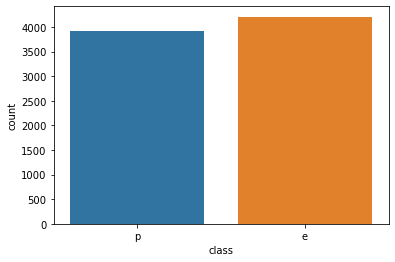

In [7]:
# categorial features no statistical info
sns.countplot(data=df,x='class')

In [12]:
feat_uni=df.describe().transpose().reset_index().sort_values('unique')
# top is most popular row of that feature

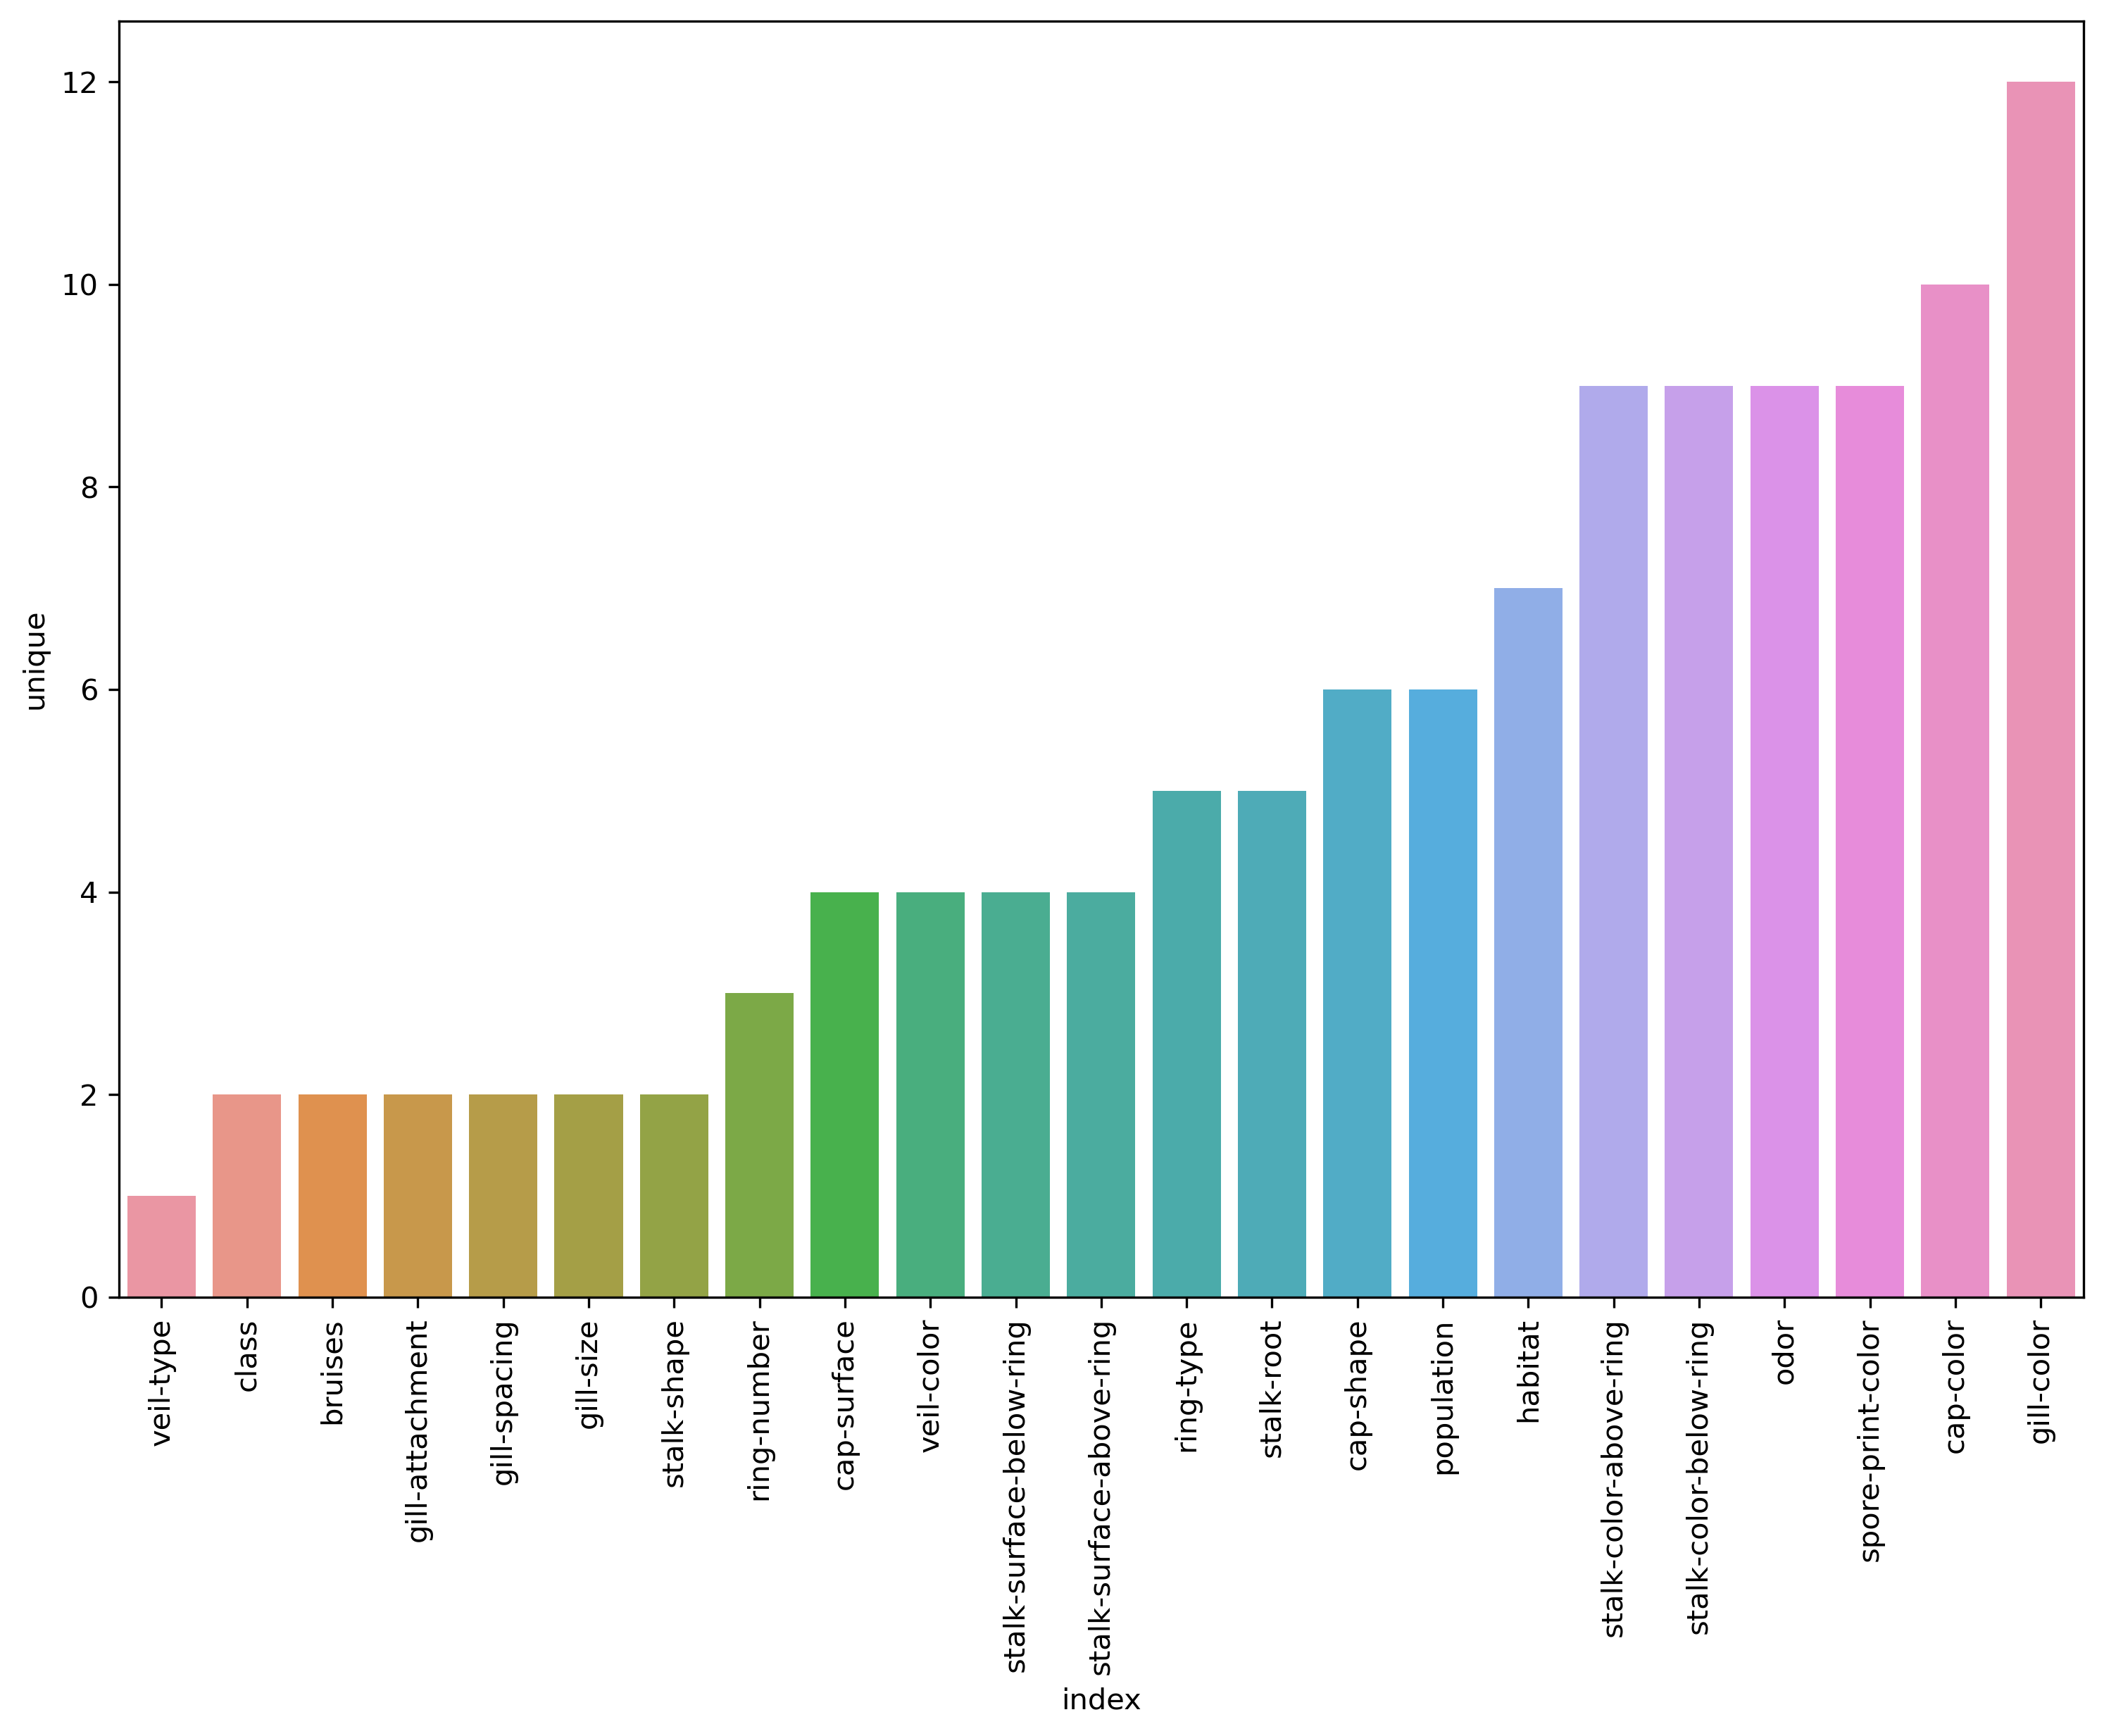

In [15]:
plt.figure(figsize=(12,8),dpi=300)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [16]:
X=df.drop('class',axis=1)

In [18]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [19]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [20]:
# Decision tree needs categorical columns as dummy variables
X=pd.get_dummies(X,drop_first=True)

In [21]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [22]:
y=df['class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
# base estimator can be any
model=AdaBoostClassifier(n_estimators=1)

In [27]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [28]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [29]:
preds=model.predict(X_test)

In [30]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [31]:
# good performance on n_estimators=1
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [32]:
model.feature_importances_
# only one feature is being split on which has 100% info

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
model.feature_importances_.argmax()

22

In [35]:
# odour none only using one feature we can get good accuracy
# strong indicator
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

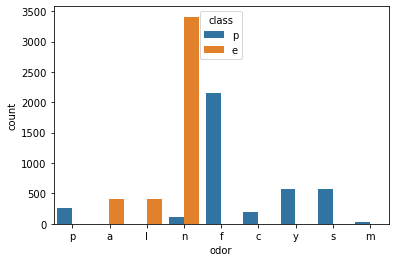

In [36]:
sns.countplot(data=df,x='odor',hue='class')
# 88 percent accuracy

In [37]:
len(X.columns)

95

In [38]:
error_rates=[]
# the no of stumps equals to the number of columns
for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    
    err=1-accuracy_score(y_test,preds)
    error_rates.append(err)

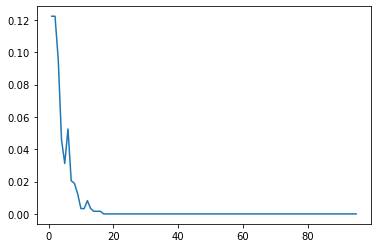

In [39]:
plt.plot(range(1,96),error_rates)
# limit on stumps around 20 their is no increase after that
# more stumps more coeff than odor won't be the most imp feature

In [40]:
model

AdaBoostClassifier(n_estimators=95)

In [43]:
features=pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Importance'])

In [45]:
imp_features=features[features['Importance']>0]
# most of features it does not care about

In [46]:
imp_features

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


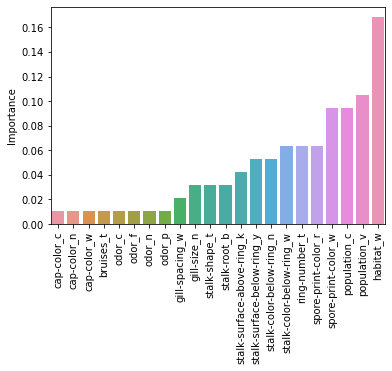

In [49]:
sns.barplot(data=imp_features.sort_values('Importance'),x=imp_features.index,y='Importance')
plt.xticks(rotation=90);

In [50]:
model=AdaBoostClassifier(n_estimators=18)

In [51]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [52]:
preds=model.predict(X_test)

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [54]:
features=pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Importance'])

In [55]:
imp_features=features[features['Importance']>0]

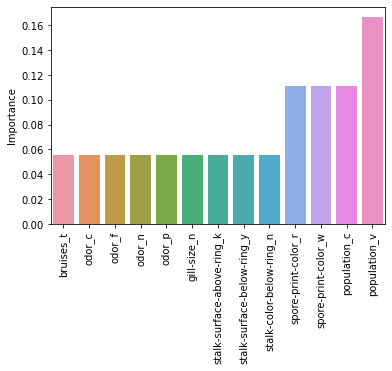

In [56]:
sns.barplot(data=imp_features.sort_values('Importance'),x=imp_features.index,y='Importance')
plt.xticks(rotation=90);
# used for feature exploration